In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#load the dataset
data= pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_dataset_new.csv")

In [12]:
import plotly.express as px 

In [15]:
#donut chart to visualize the frequency of outcomes(0 & 1) in the dataset
outcome_frequency = data['diabetes'].value_counts() #returns total 0's and 1's
outcome_frequency.index = ['Non-Diabetic', 'Diabetic']  # replace 0 and 1 with text labels
colors=['teal','paleturquoise']
figure = px.pie(outcome_frequency, values=outcome_frequency.values, names=outcome_frequency.index,
             hole=0.5, color=outcome_frequency.index, color_discrete_sequence=colors)
figure.update_layout(title='People Affected by Diabetes.',
                  plot_bgcolor='#FFFFFF',
                  paper_bgcolor='#FFFFFF',
                  font_color='#333333',
                  title_x=0.5,
                  title_font_size=24)
figure.update_traces(texttemplate='%{percent:.1%}', textposition='inside')
figure.show()

In [91]:
data['smoking_history']=data['smoking_history'].map({0:'never',1:'current',
                                                         -2:'former',2:'ever',-1:'not current'})

In [90]:
data['gender']=data['gender'].map({1:'Female',0:'Male'}) 

In [92]:
#visualization of categorical variables
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

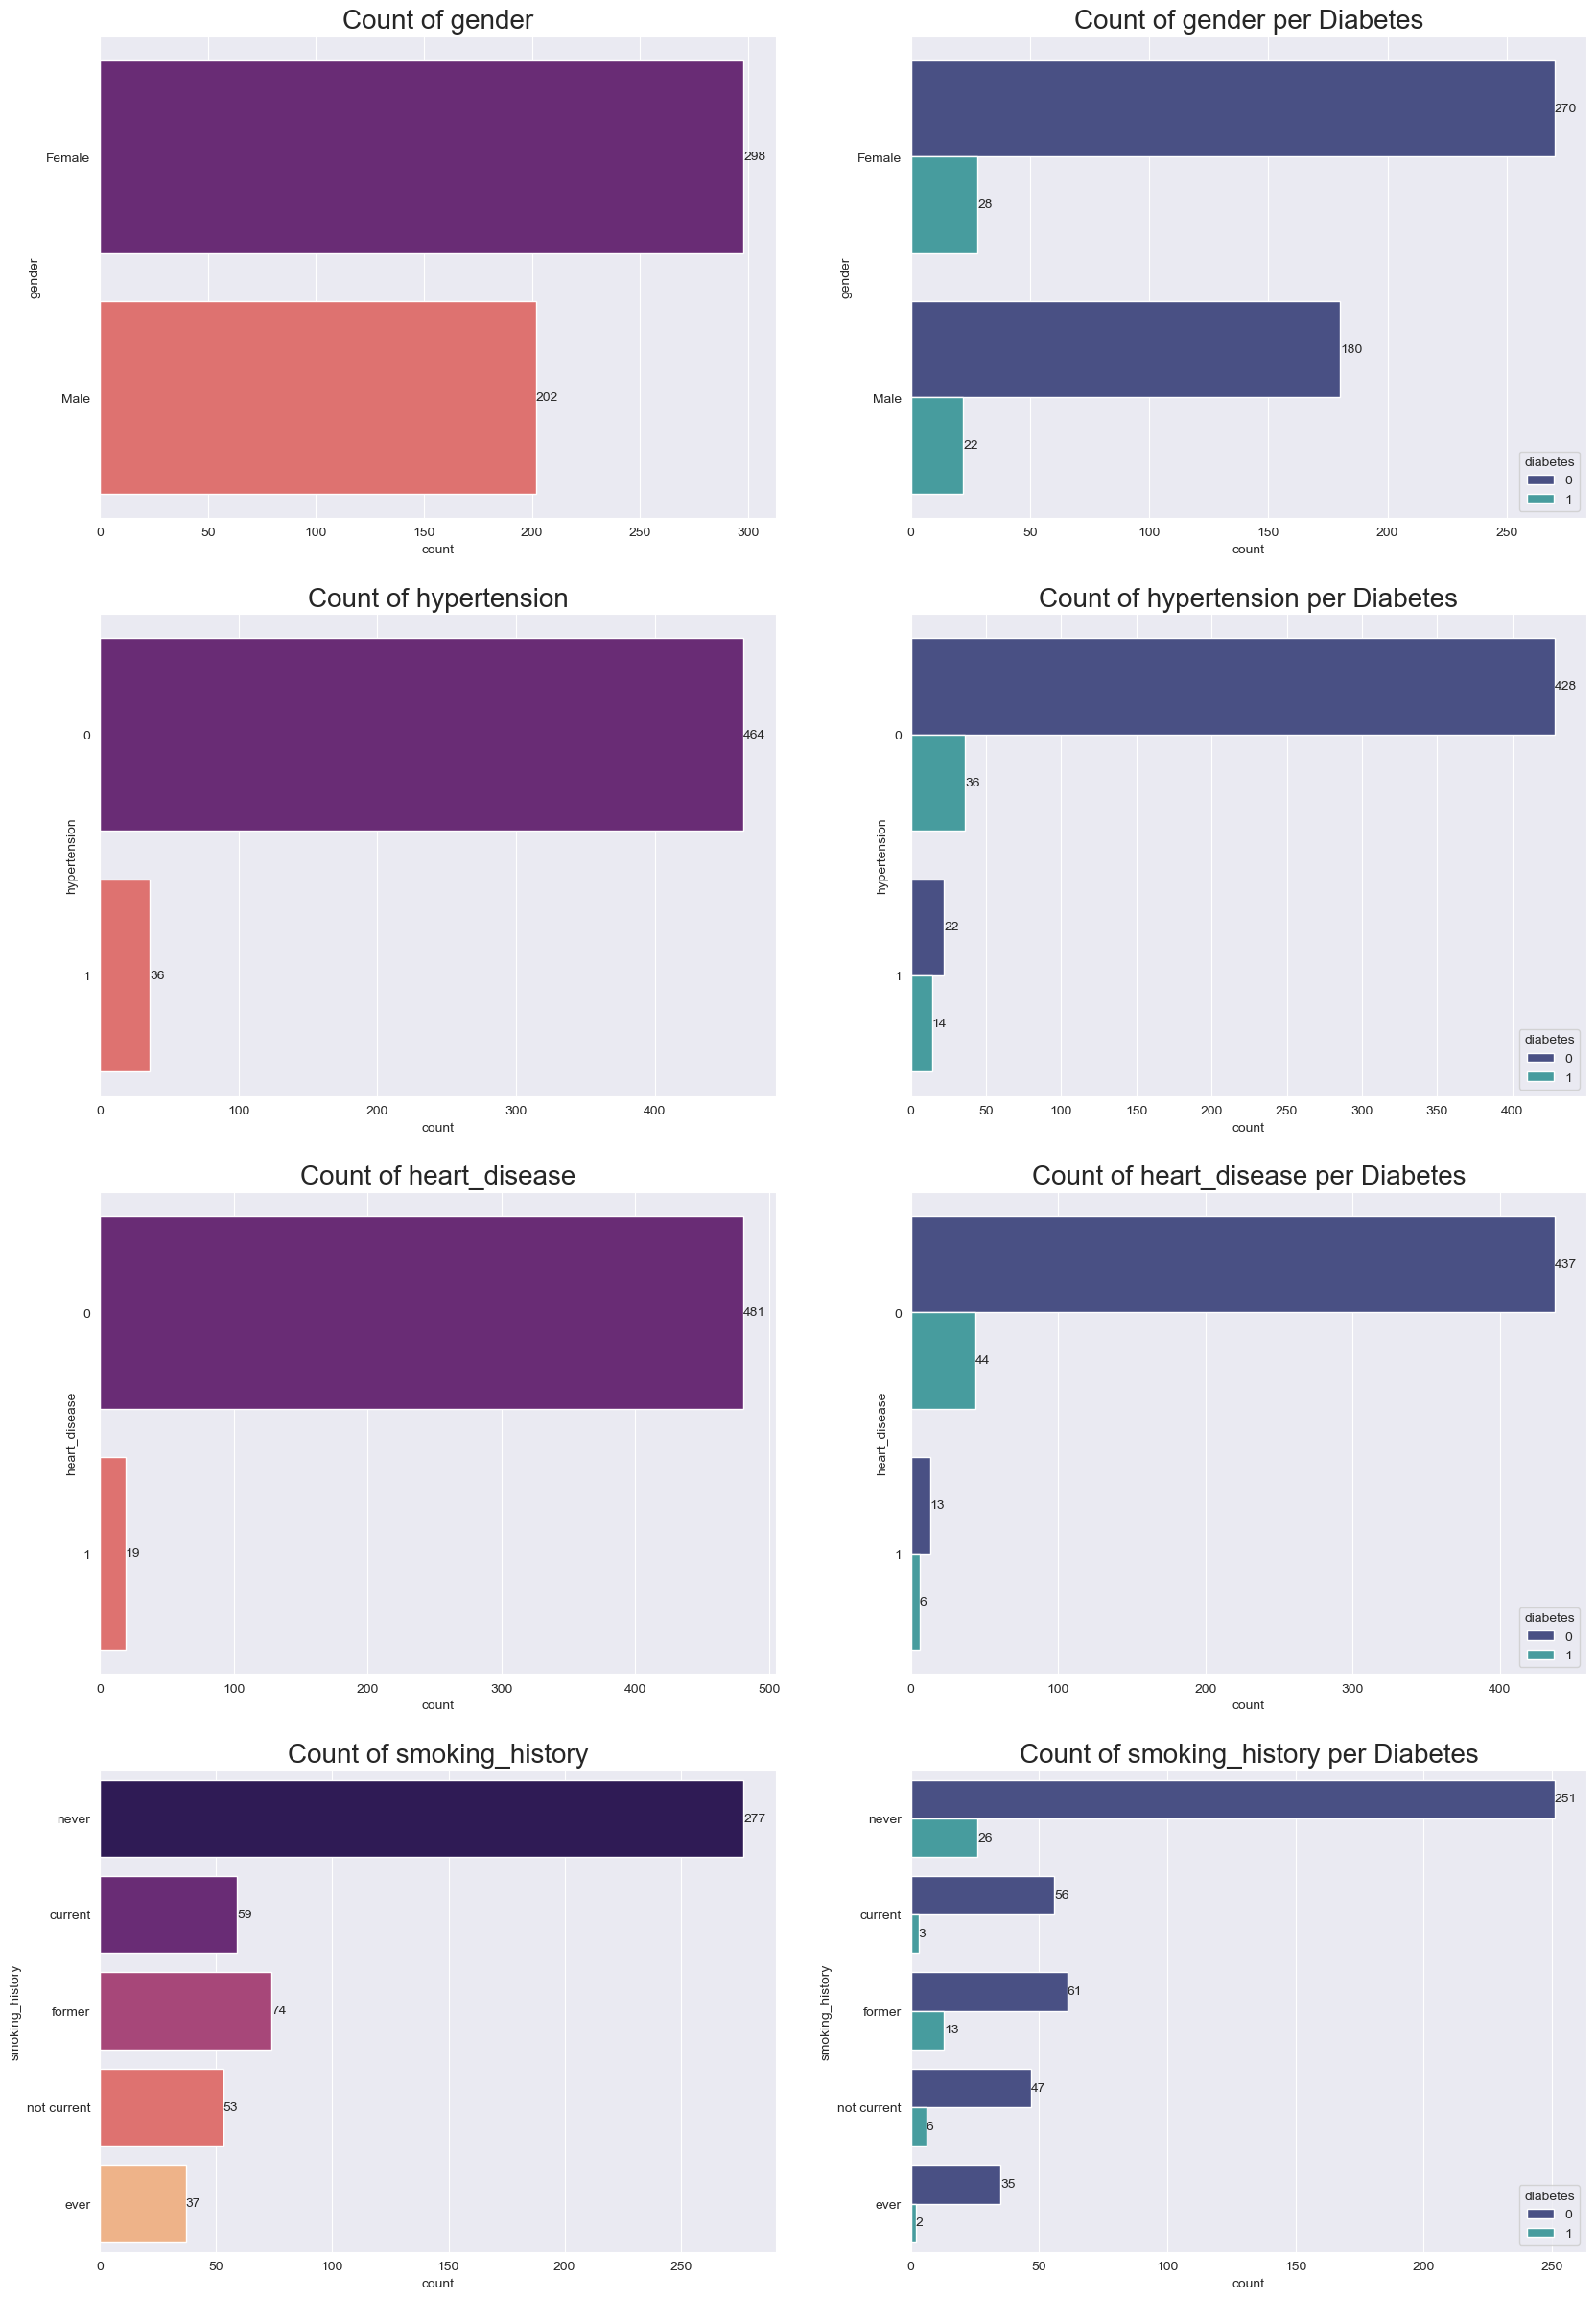

In [93]:
fig, axes = plt.subplots(4,2, figsize=(20,30))
sns.set_style('darkgrid')
idx = 0
for col in categorical_variables:
    sns.countplot(data=data, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=data, y=col, palette='mako', orient='h',  hue='diabetes',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

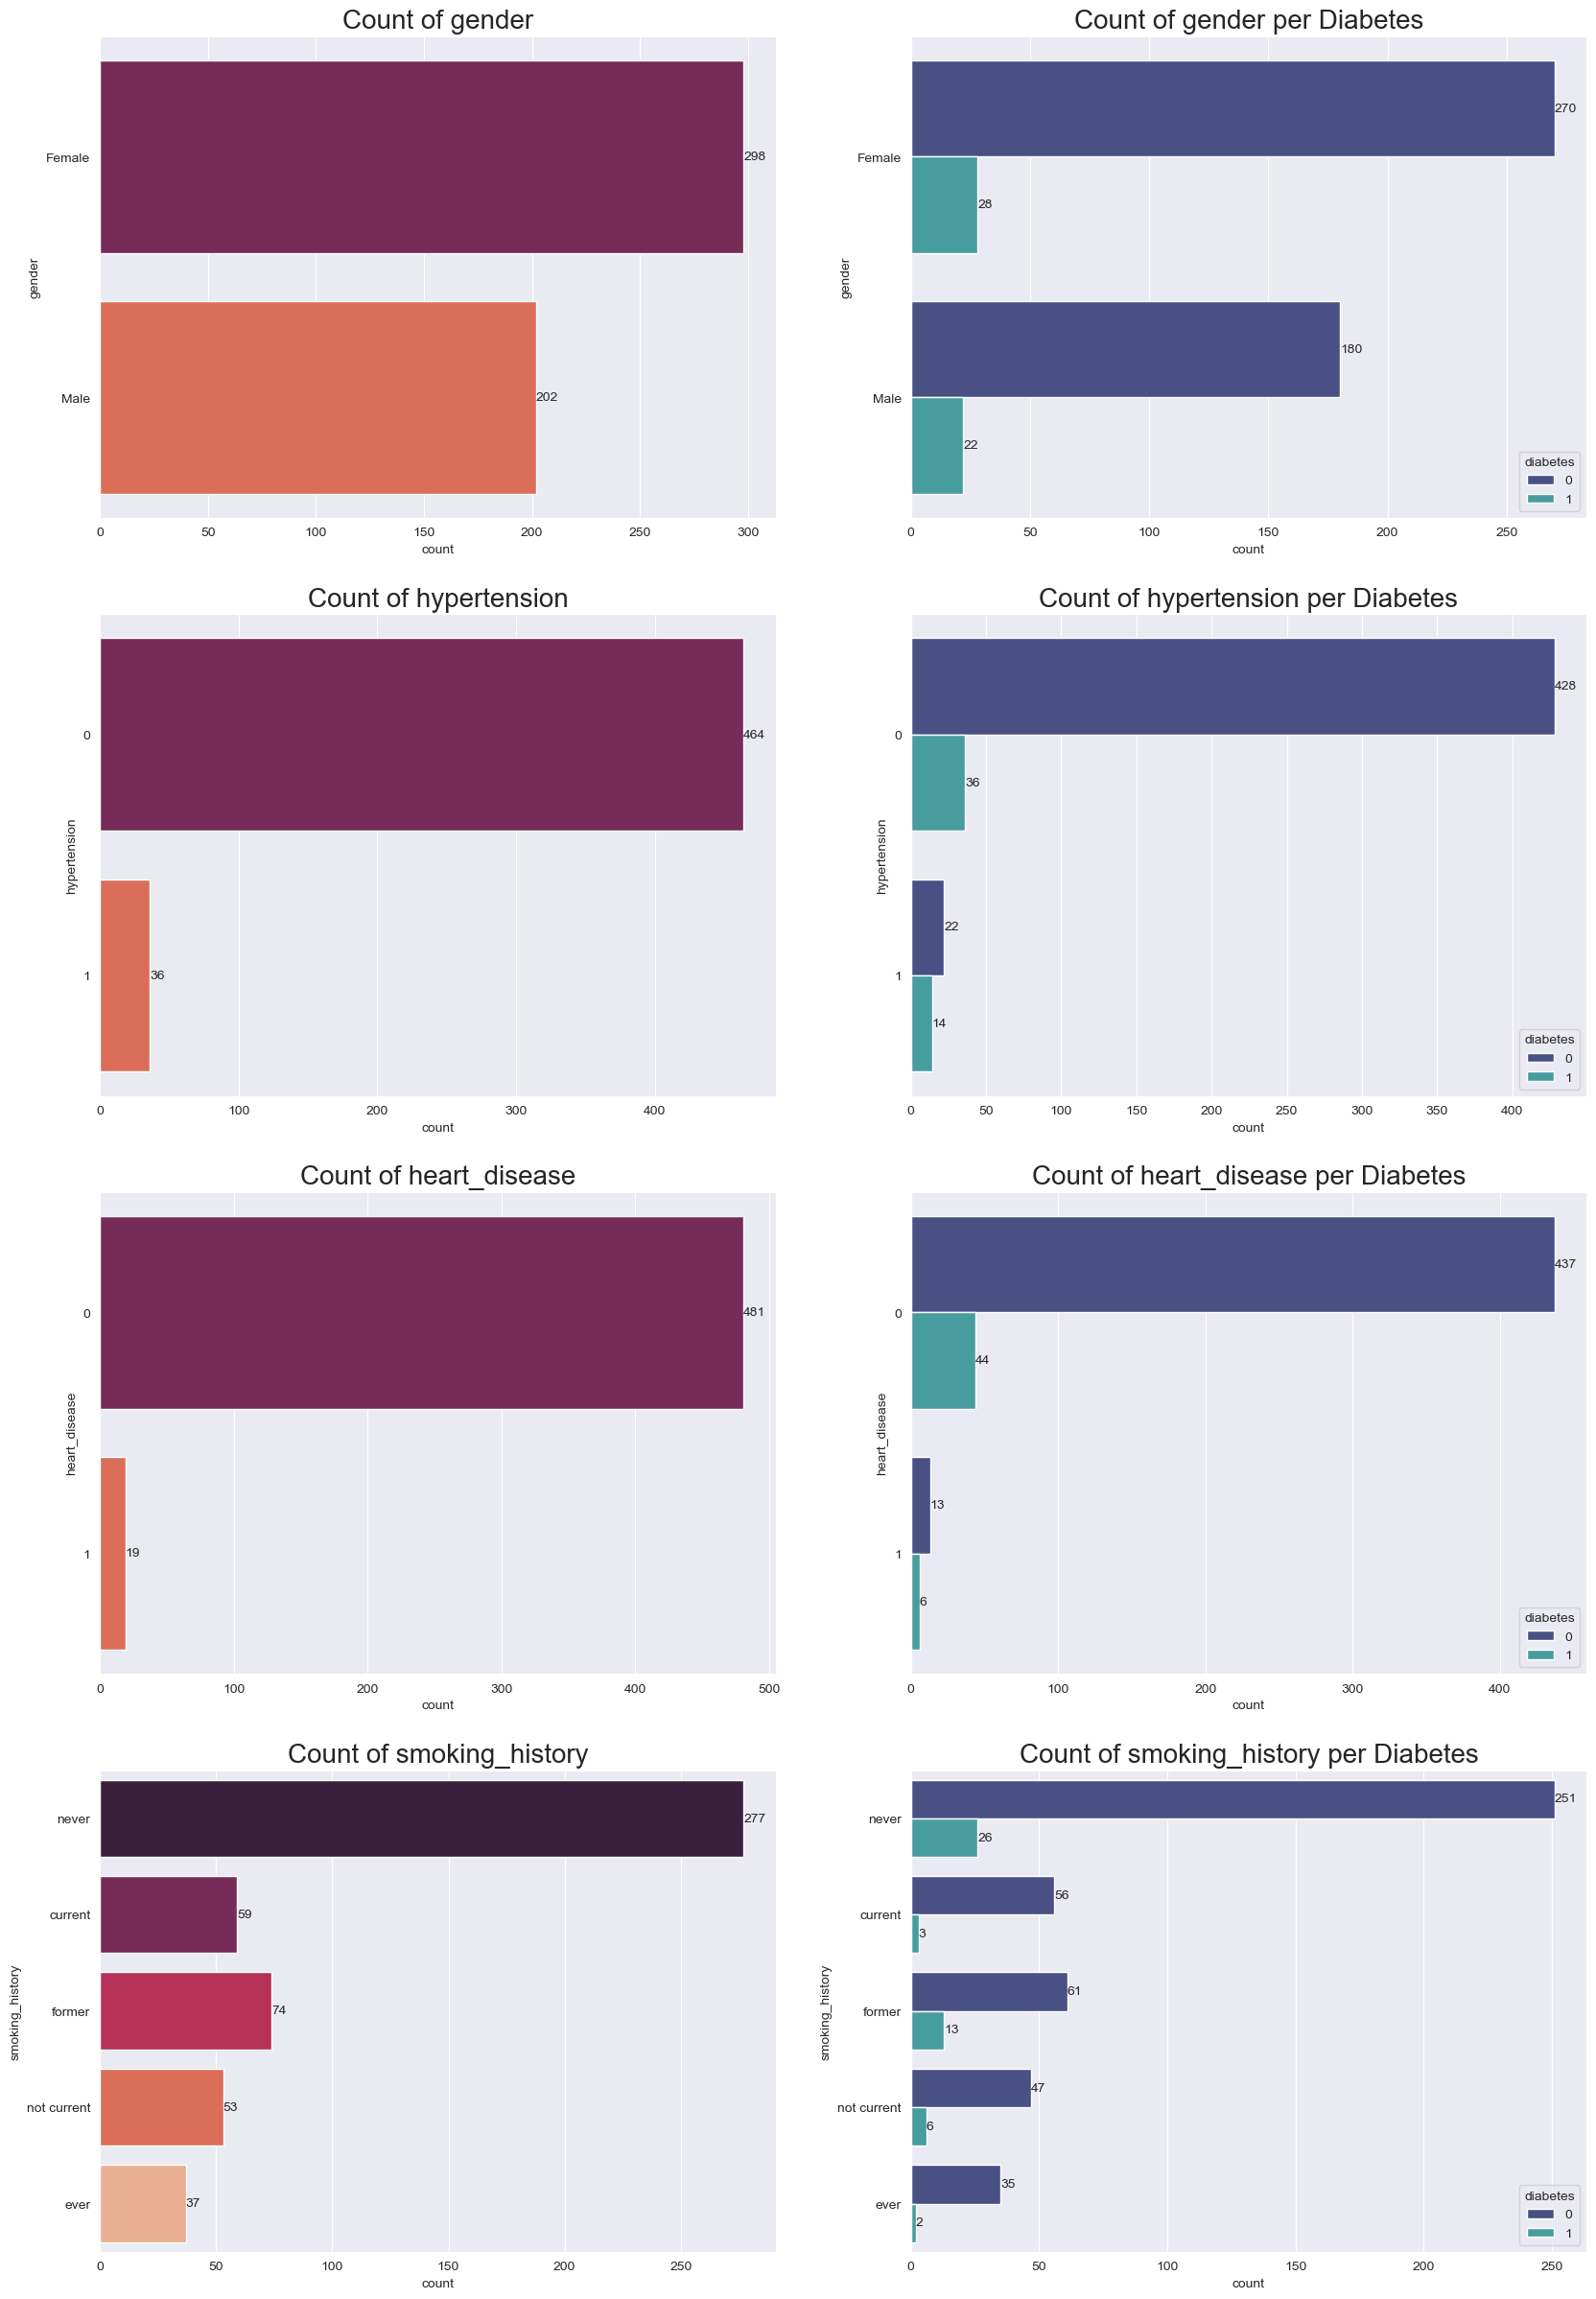

In [94]:
fig, axes = plt.subplots(4,2, figsize=(20,30))
#sns.set_style("darkgrid", {"grid.color": "lightblue"})#custom style with a light blue grid
sns.set_style('darkgrid')
idx = 0
for col in categorical_variables:
    sns.countplot(data=data, y=col, palette='rocket', orient='v',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=data, y=col, palette='mako', orient='v',  hue='diabetes',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

In [ ]:
#data['smoking_history']=data['smoking_history'].map({'never':0,'current':1, 'former':-2,'ever':2,'not current':-1})
#data['gender']=data['gender'].map({'Female':1,'Male':0}) 

In [95]:
#visualization of numerical variables
numerical_variables= ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

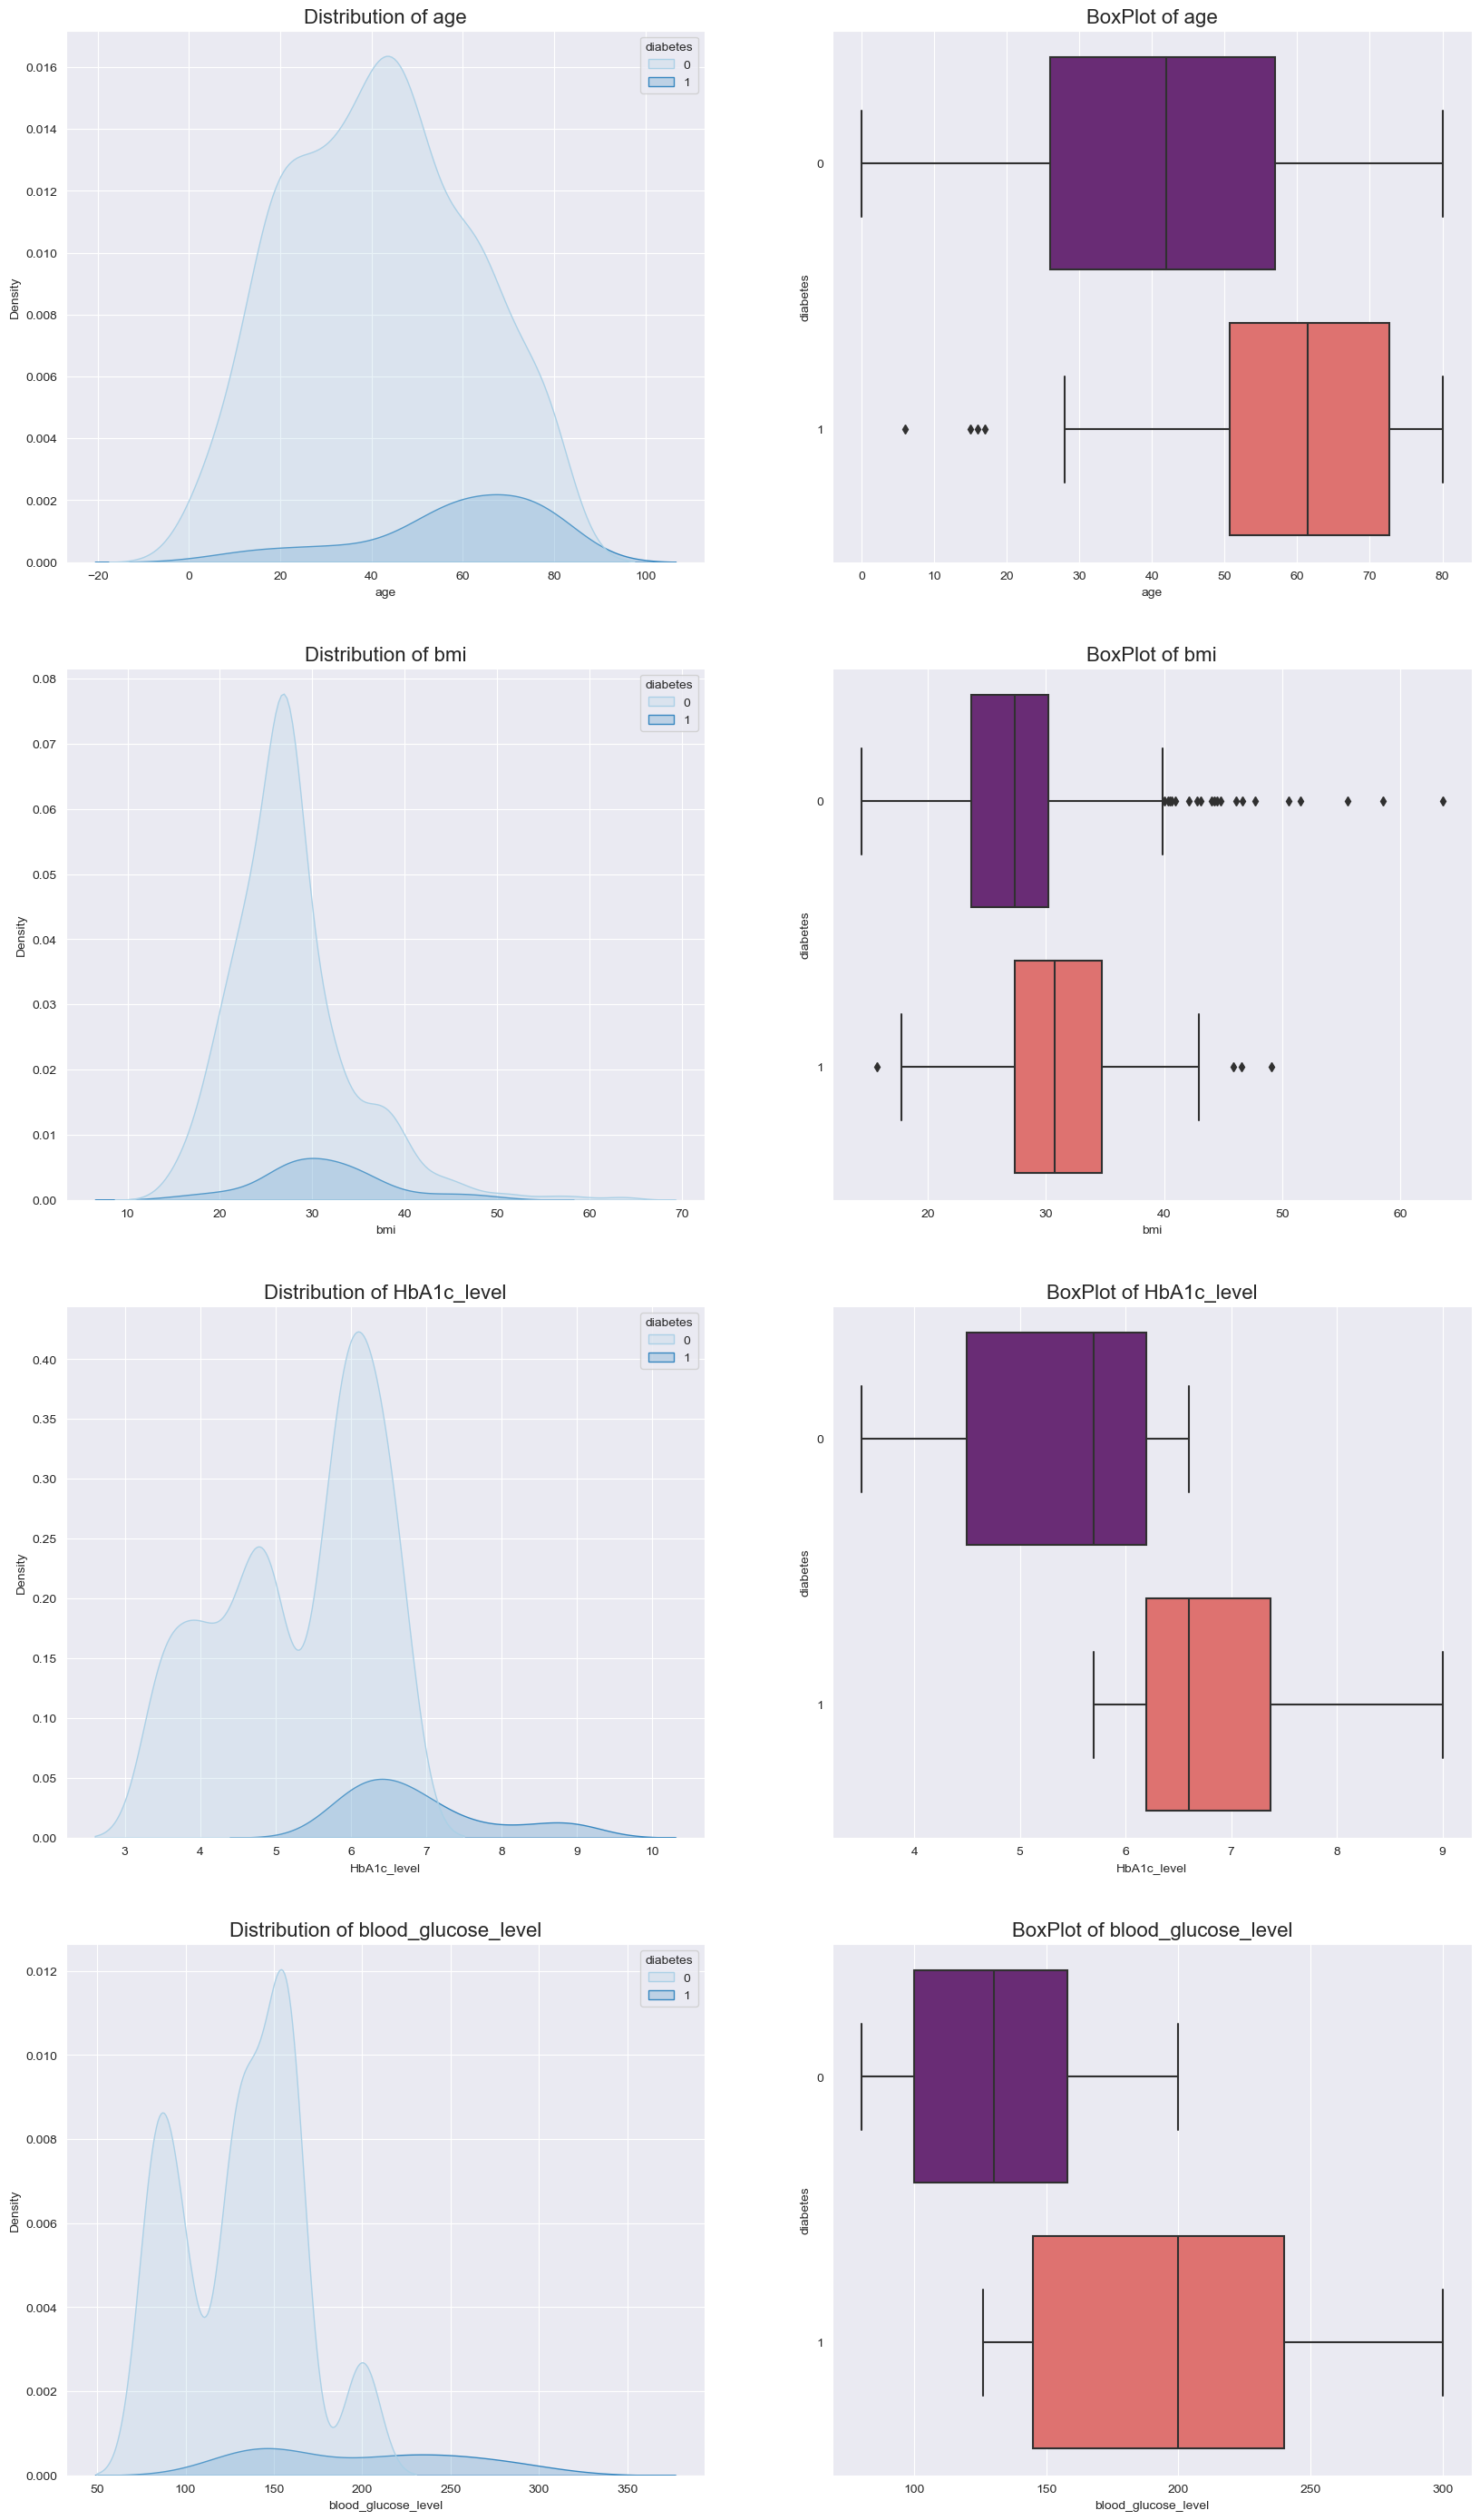

In [61]:
fig, axes = plt.subplots(4,2, figsize=(20,35))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_variables):
    sns.kdeplot(data=data, x=col, palette='Blues',fill=True , hue='diabetes',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=data, x=col, palette='magma' , y='diabetes', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

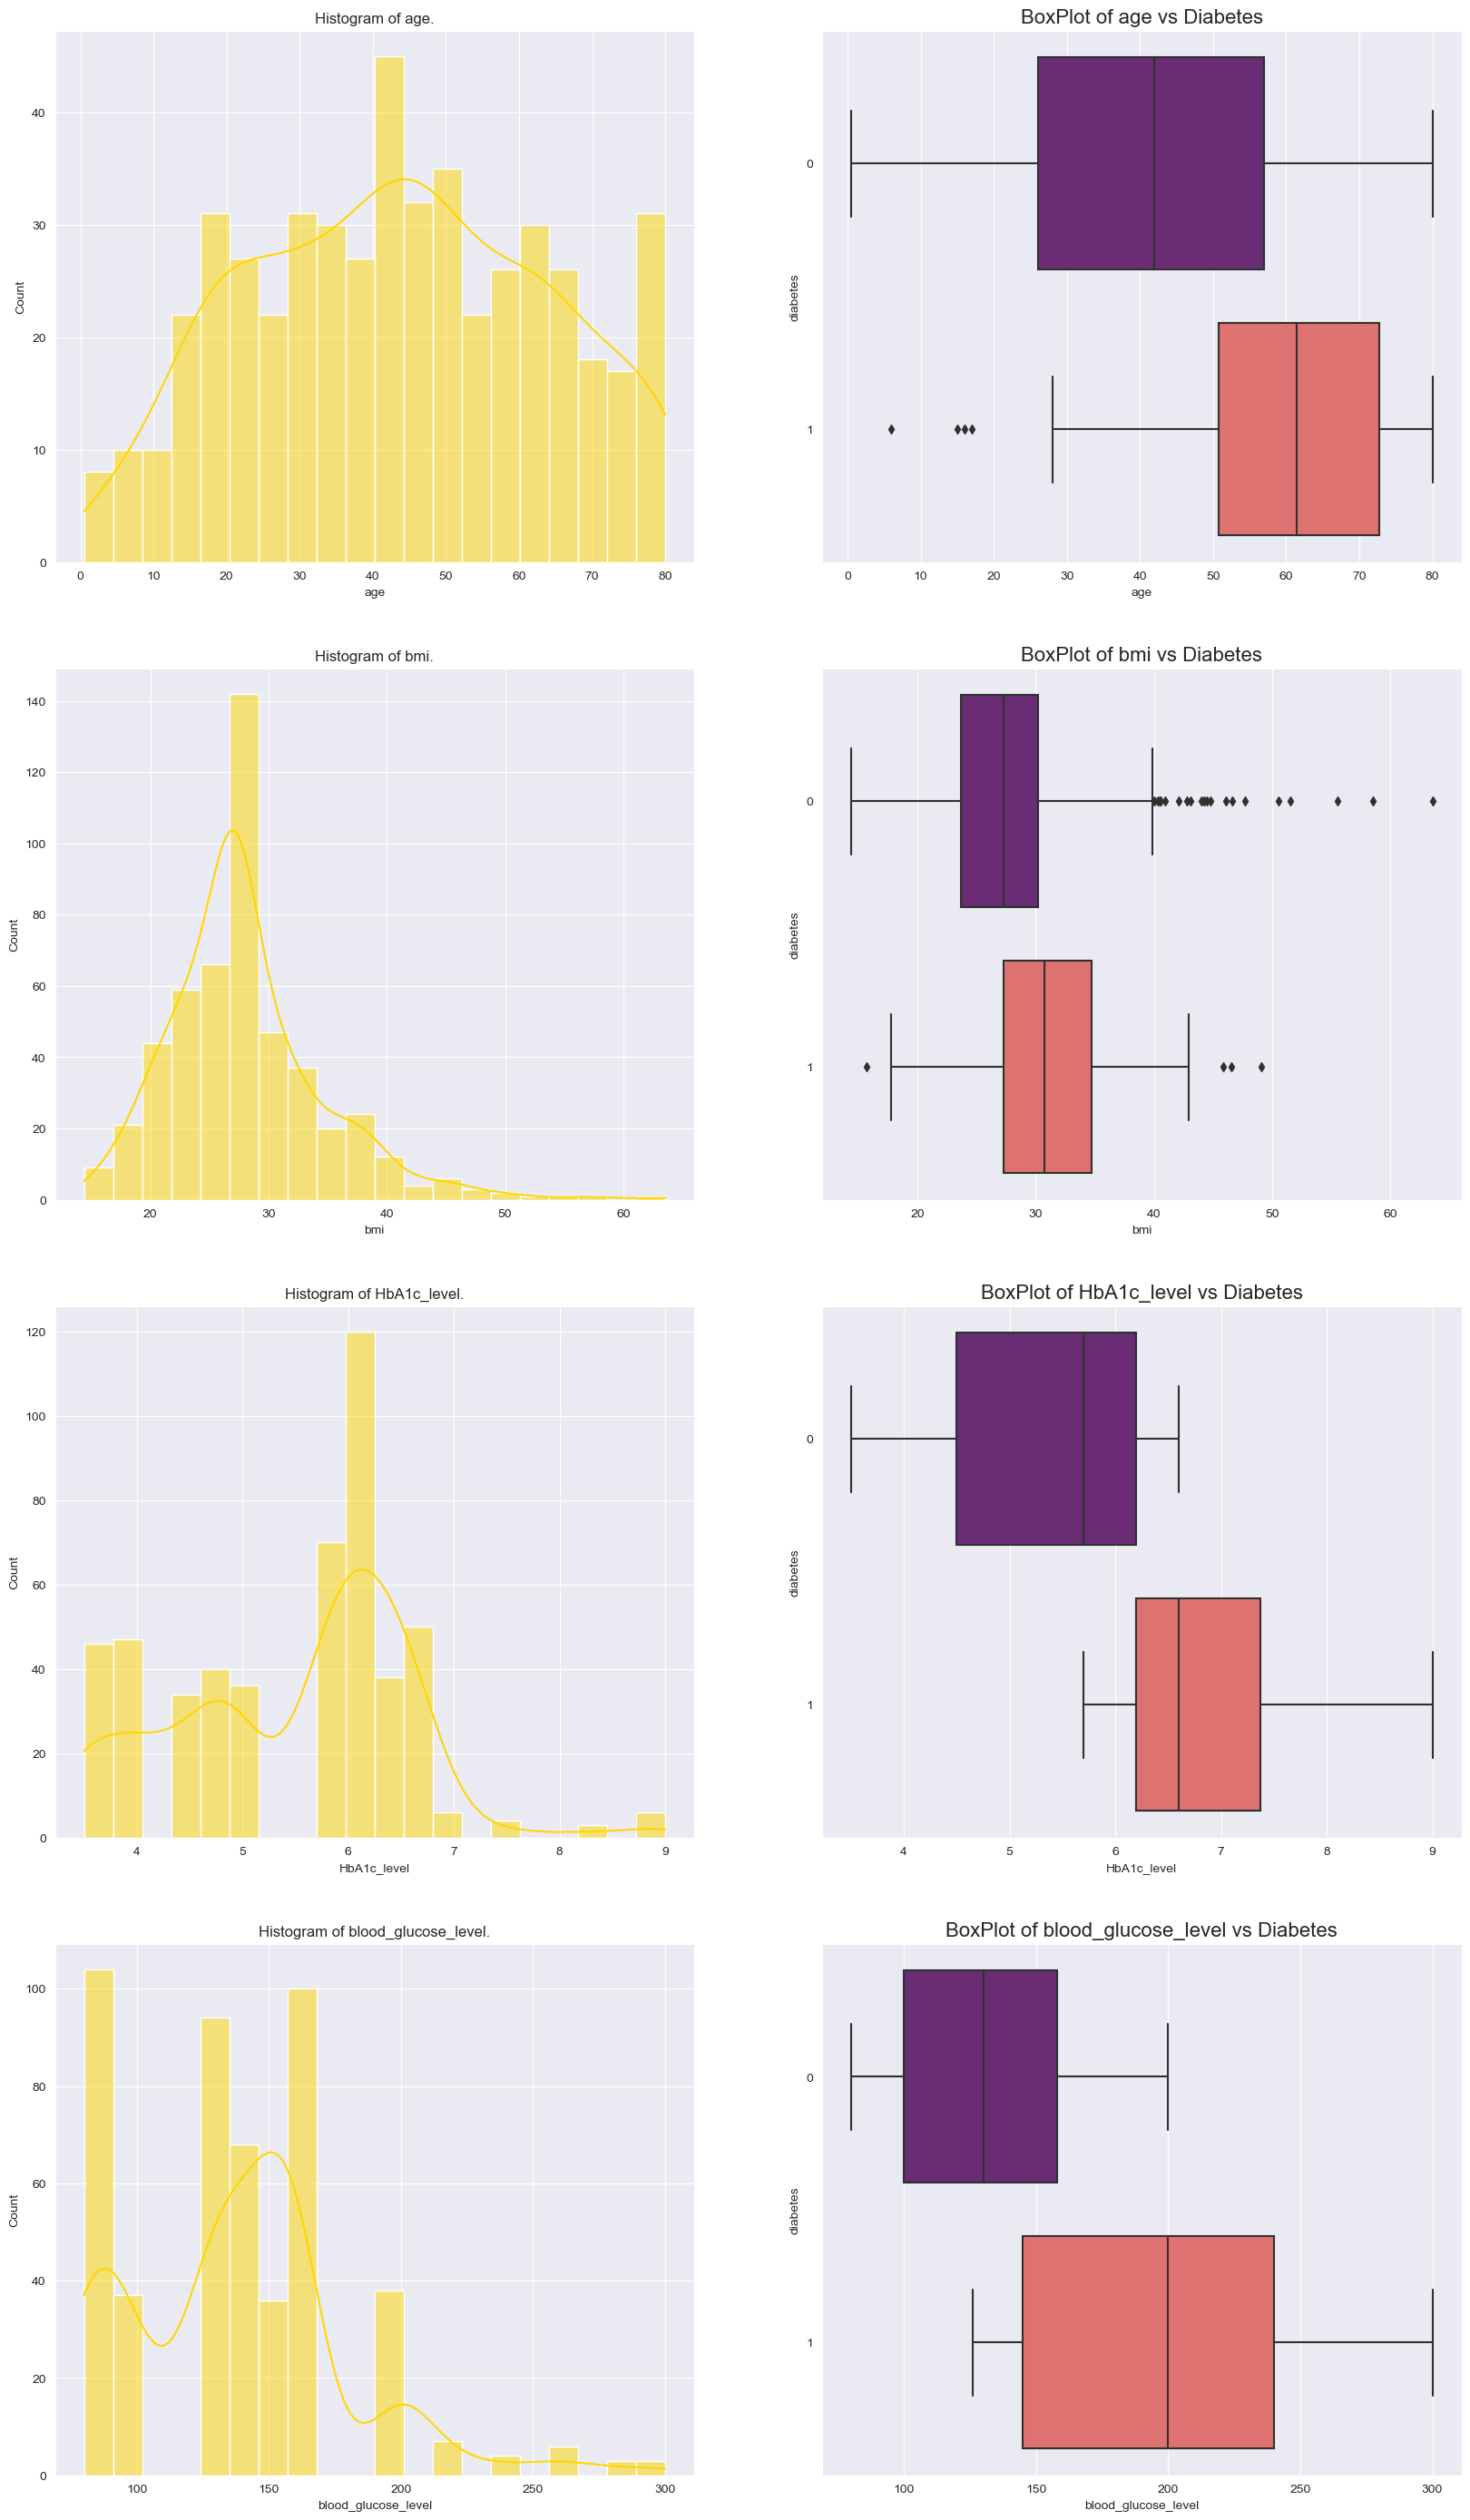

In [97]:
fig, axes = plt.subplots(4,2, figsize=(20,35))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_variables):
       sns.histplot(x=data[col], kde=True, bins=20, color='gold',
                  ax=axes[idx][0]).set_title(f'Histogram of {col}.')
      
       sns.boxplot(data=data, x=col, palette='magma' , y='diabetes', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col} vs Diabetes', fontsize='16')
       idx +=1
plt.show()

In [98]:
data['smoking_history']=data['smoking_history'].map({'never':0,'current':1, 'former':-2,'ever':2,'not current':-1})
data['gender']=data['gender'].map({'Female':1,'Male':0}) 

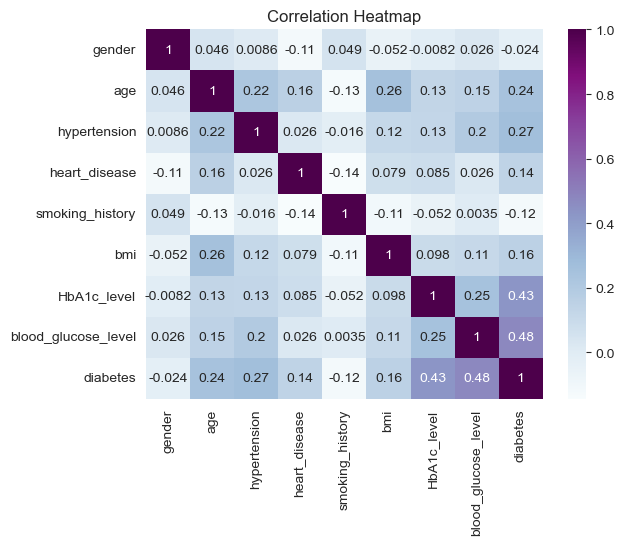

<Figure size 1800x1800 with 0 Axes>

In [114]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu")
plt.title("Correlation Heatmap")
plt.figure(figsize=(18, 18))
plt.show()